In this example we will try to lassify Reuters newswires into 46 mutually
exclusive topics

# Import Libraries

In [2]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

2023-11-13 20:35:43.579447: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 20:35:44.284669: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/lib/x86_64-linux-gnu/:/usr/local/cuda-11/targets/x86_64-linux/lib/:/opt/oracle:/opt/oracle/lib/:
2023-11-13 20:35:44.284704: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-13 20:35:44.388006: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable

# Import Data

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [4]:
print('train sequences: ', len(train_data))
print('test sequences: ', len(test_data))

train sequences:  8982
test sequences:  2246


In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
# Decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [7]:
# Encoding the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i , sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)


x_train shape:  (8982, 10000)
x_test shape:  (2246, 10000)


In [8]:
# One-hot encoding the labels

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print('one_hot_train_labels shape: ', one_hot_train_labels.shape)
print('one_hot_test_labels shape: ', one_hot_test_labels.shape)

one_hot_train_labels shape:  (8982, 46)
one_hot_test_labels shape:  (2246, 46)


In [9]:
# Model definition

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

2023-11-13 20:35:50.288489: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/lib/x86_64-linux-gnu/:/usr/local/cuda-11/targets/x86_64-linux/lib/:/opt/oracle:/opt/oracle/lib/:
2023-11-13 20:35:50.289095: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-13 20:35:50.289146: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (killuamam-KLVL-WXX9): /proc/driver/nvidia/version does not exist
2023-11-13 20:35:50.290331: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable th

In [10]:
# Compiling the model
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [11]:
# Validating the approach

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


Now let's train our model for 20 epochs

In [12]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.8251 - accuracy: 0.5078 - val_loss: 1.9443 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5650 - accuracy: 0.6924 - val_loss: 1.4123 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.1448 - accuracy: 0.7575 - val_loss: 1.1952 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8955 - accuracy: 0.8115 - val_loss: 1.0753 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.7163 - accuracy: 0.8544 - val_loss: 1.0071 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5761 - accuracy: 0.8875 - val_loss: 0.9497 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.4624 - accuracy: 0.9088 - val_loss: 0.9191 - val_accuracy: 0.8160
Epoch 8/20
16

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

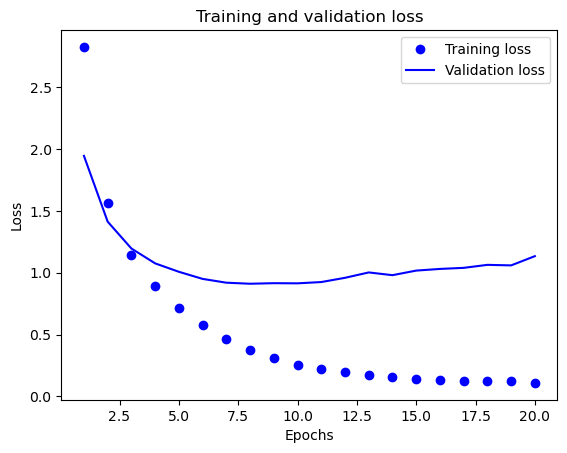

In [14]:
# Plotting the training and validation loss

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # bo is for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b is for solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

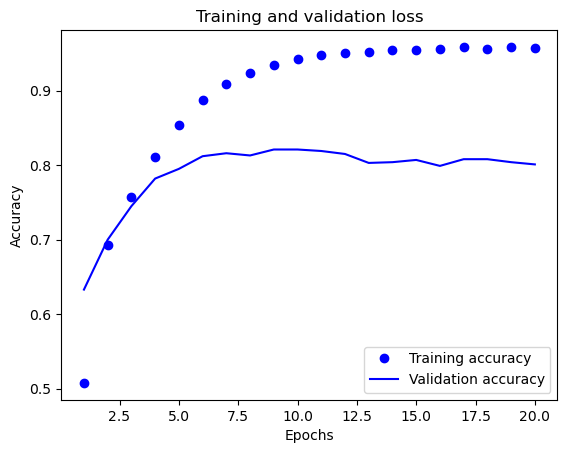

In [15]:
# Plotting the training and the validation accuracy
plt.clf()


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We observe that the model starts overfitting after 9 epochs. Let's train a new model from scratch for 9 epochs and evaluate it on the test set

In [16]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [17]:
# Compile the model

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 27ms/step - loss: 2.5061 - accuracy: 0.4880 - val_loss: 1.6699 - val_accuracy: 0.6290
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.3852 - accuracy: 0.7112 - val_loss: 1.3049 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.0393 - accuracy: 0.7806 - val_loss: 1.1519 - val_accuracy: 0.7450
Epoch 4/9
16/16 [==============================] - 0s 19ms/step - loss: 0.8236 - accuracy: 0.8210 - val_loss: 1.0461 - val_accuracy: 0.7740
Epoch 5/9
16/16 [==============================] - 0s 19ms/step - loss: 0.6594 - accuracy: 0.8601 - val_loss: 0.9863 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.5243 - accuracy: 0.8913 - val_loss: 0.9561 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 0s 21ms/step - loss: 0.4267 - accuracy: 0.9118 - val_loss: 0.9112 - val_accuracy: 0.8020
Epoch 8/9
16/16 [===

In [19]:
results

[0.9667606949806213, 0.784060537815094]

We achieve an accuracy of 78.7% on the test set, which is not bad compared to the baseline accuracy of 18% (random guessing). 